# Brent Oil Price Exploratory Data Analysis

**Objective:** Perform comprehensive exploratory analysis of Brent crude oil prices to understand data characteristics and inform modeling decisions.

**Contents:**
1. Data Loading and Preprocessing
2. Descriptive Statistics
3. Price Trend Visualization
4. Stationarity Testing
5. Volatility Analysis
6. Autocorrelation Analysis

In [4]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss

# Add src to path
sys.path.append('../src')
from data_loader import BrentDataLoader, EventDataLoader
from time_series_analysis import TimeSeriesAnalyzer

# Create output directories
os.makedirs("../outputs/figures", exist_ok=True)
os.makedirs("../outputs/reports", exist_ok=True)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)


## 1. Data Loading and Preprocessing

In [5]:
# Load Brent oil price data
loader = BrentDataLoader(data_path='../data/events/BrentOilPrices.csv')
df = loader.load_data()
df = loader.preprocess()

print(f"\nData shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nFirst few rows:")
df.head()


Loaded 9011 records


c:\Users\HP\Desktop\Brent-Oil-Price-Analysis\notebooks\../src\data_loader.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['Date'] = pd.to_datetime(


Data preprocessed: 1987-05-20 00:00:00 to 2022-11-14 00:00:00

Data shape: (9011, 4)
Date range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00

First few rows:


,Date,Price,Returns,Log_Returns
0,1987-05-20,18.63,NaN,NaN
1,1987-05-21,18.45,-0.009662,-0.009709
2,1987-05-22,18.55,0.005420,0.005405
3,1987-05-25,18.60,0.002695,0.002692
4,1987-05-26,18.63,0.001613,0.001612


## 2. Descriptive Statistics

In [3]:
# Summary statistics
stats = loader.get_summary_stats()
print("\n=== Summary Statistics ===")
for key, value in stats.items():
    print(f"{key}: {value}")

print("\n=== Price Distribution ===")
print(df['Price'].describe())


=== Summary Statistics ===
count: 9011
mean: 48.42078237709466
median: 38.57
std: 32.86010995167221
min: 9.1
max: 143.95
start_date: 1987-05-20 00:00:00
end_date: 2022-11-14 00:00:00

=== Price Distribution ===
count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


## 3. Price Trend Visualization

In [6]:
# Initialize analyzer
analyzer = TimeSeriesAnalyzer(df)

# Calculate moving averages
analyzer.calculate_moving_averages([30, 90, 365])


,Price,Returns,Log_Returns,MA_30,MA_90,MA_365
Date,,,,,,
1987-05-20,18.63,NaN,NaN,NaN,NaN,NaN
1987-05-21,18.45,-0.009662,-0.009709,NaN,NaN,NaN
1987-05-22,18.55,0.005420,0.005405,NaN,NaN,NaN
1987-05-25,18.60,0.002695,0.002692,NaN,NaN,NaN
1987-05-26,18.63,0.001613,0.001612,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-11-08,96.85,-0.030239,-0.030706,93.685333,98.542333,92.410548
2022-11-09,93.05,-0.039236,-0.040026,93.802000,98.222889,92.471753
2022-11-10,94.25,0.012896,0.012814,93.963333,98.042444,92.534630


### Interpretation:

The Brent oil price series shows several distinct periods:
- **1987-1999:** Relatively stable prices around $15-20/barrel
- **2000-2008:** Strong upward trend, peaking near $147/barrel in July 2008
- **2008-2009:** Sharp crash during financial crisis
- **2010-2014:** Recovery and stabilization around $100-120/barrel
- **2014-2016:** Major decline due to oversupply
- **2020:** COVID-19 pandemic crash
- **2021-2022:** Recovery and volatility

Moving averages help identify long-term trends and smooth out short-term fluctuations.

## 4. Stationarity Testing

Stationarity is crucial for time series modeling. A stationary series has constant mean and variance over time.

In [7]:
# Test stationarity
stationarity_results = analyzer.test_stationarity()

print("\n=== STATIONARITY TEST RESULTS ===")
print("\n1. Augmented Dickey-Fuller (ADF) Test")
print("   Null Hypothesis: Series has a unit root (non-stationary)")
print(f"   Test Statistic: {stationarity_results['ADF']['statistic']:.4f}")
print(f"   P-value: {stationarity_results['ADF']['p_value']:.4f}")
print(f"   Result: {stationarity_results['ADF']['interpretation']}")
if stationarity_results['ADF']['p_value'] < 0.05:
    print("   → Reject null hypothesis: Series is STATIONARY")
else:
    print("   → Fail to reject null hypothesis: Series is NON-STATIONARY")

print("\n2. KPSS Test")
print("   Null Hypothesis: Series is stationary")
print(f"   Test Statistic: {stationarity_results['KPSS']['statistic']:.4f}")
print(f"   P-value: {stationarity_results['KPSS']['p_value']:.4f}")
print(f"   Result: {stationarity_results['KPSS']['interpretation']}")
if stationarity_results['KPSS']['p_value'] < 0.05:
    print("   → Reject null hypothesis: Series is NON-STATIONARY")
else:
    print("   → Fail to reject null hypothesis: Series is STATIONARY")


=== STATIONARITY TEST RESULTS ===

1. Augmented Dickey-Fuller (ADF) Test
   Null Hypothesis: Series has a unit root (non-stationary)
   Test Statistic: -1.9939
   P-value: 0.2893
   Result: Non-stationary
   → Fail to reject null hypothesis: Series is NON-STATIONARY

2. KPSS Test
   Null Hypothesis: Series is stationary
   Test Statistic: 9.5588
   P-value: 0.0100
   Result: Non-stationary
   → Reject null hypothesis: Series is NON-STATIONARY


c:\Users\HP\Desktop\Brent-Oil-Price-Analysis\notebooks\../src\time_series_analysis.py:52: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(prices, regression='c', nlags='auto')


### Interpretation:

**Price Series:** Typically non-stationary due to trends and structural breaks
- Change point models are appropriate for non-stationary series with structural breaks
- Returns (log or percentage) are often more stationary

**Implications for Modeling:**
- Non-stationary price series → Use change point detection to identify regime shifts
- Stationary returns → Can use standard time series models for returns analysis
- Multiple regimes → Bayesian change point model captures structural breaks

## 5. Volatility Analysis

Volatility measures price variability and risk. High volatility periods often correspond to major events.

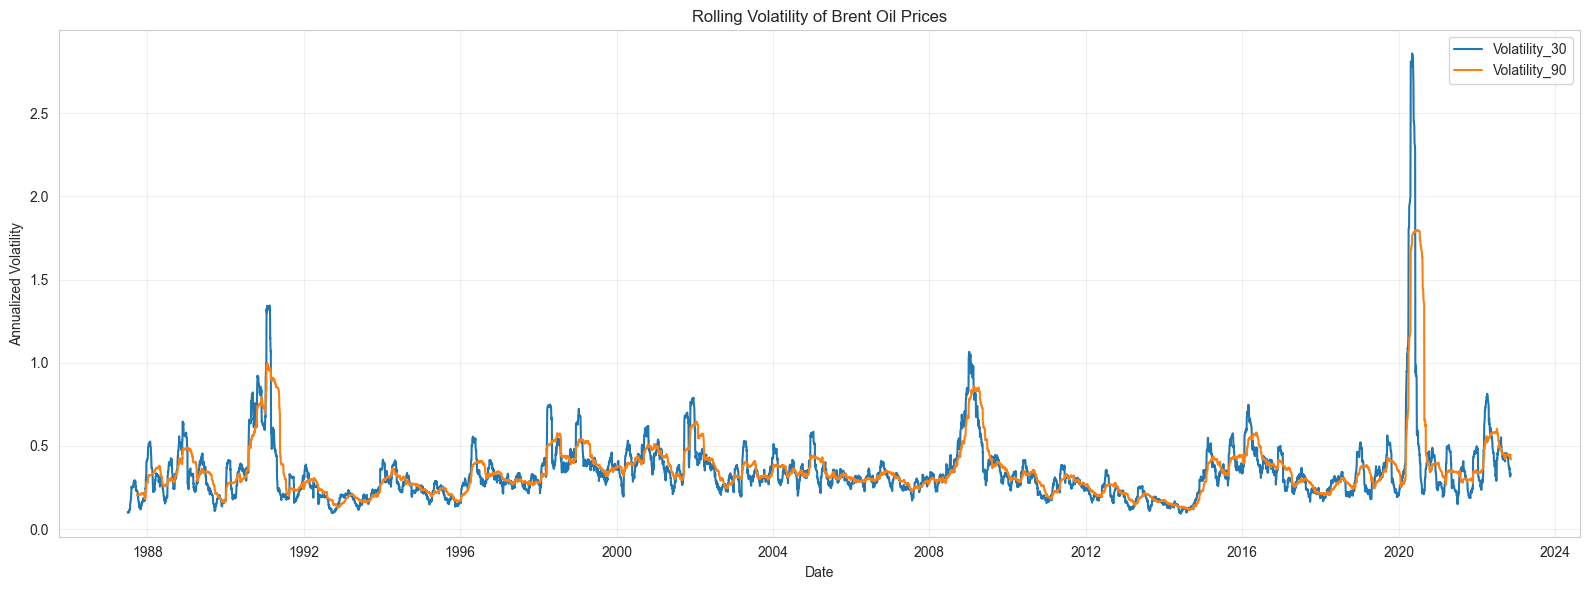


✓ Volatility plot saved to outputs/figures/volatility_plot.png


In [8]:
# Calculate volatility
analyzer.calculate_volatility([30, 90])

# Plot volatility
fig = analyzer.plot_volatility(figsize=(16, 6))
plt.savefig("../outputs/figures/volatility_plot.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Volatility plot saved to outputs/figures/volatility_plot.png")

In [9]:
# Volatility statistics
print("\n=== VOLATILITY STATISTICS ===")
print("\n30-Day Rolling Volatility:")
print(analyzer.df['Volatility_30'].describe())
print("\n90-Day Rolling Volatility:")
print(analyzer.df['Volatility_90'].describe())


=== VOLATILITY STATISTICS ===

30-Day Rolling Volatility:
count    8981.000000
mean        0.341433
std         0.209850
min         0.092206
25%         0.236603
50%         0.306234
75%         0.387630
max         2.860153
Name: Volatility_30, dtype: float64

90-Day Rolling Volatility:
count    8921.000000
mean        0.353232
std         0.191419
min         0.115164
25%         0.265668
50%         0.316531
75%         0.393158
max         1.797731
Name: Volatility_90, dtype: float64


### Interpretation:

**Volatility Patterns:**
- **Volatility Clustering:** High volatility periods cluster together (2008-2009, 2014-2016, 2020)
- **Regime-Dependent:** Different volatility levels in different market regimes
- **Event-Driven:** Spikes correspond to major geopolitical/economic events

**Implications for Modeling:**
- Change point model should capture variance shifts, not just mean shifts
- High volatility periods may indicate structural breaks
- GARCH-type models could complement change point analysis

## 6. Autocorrelation Analysis

Autocorrelation measures how current values relate to past values.

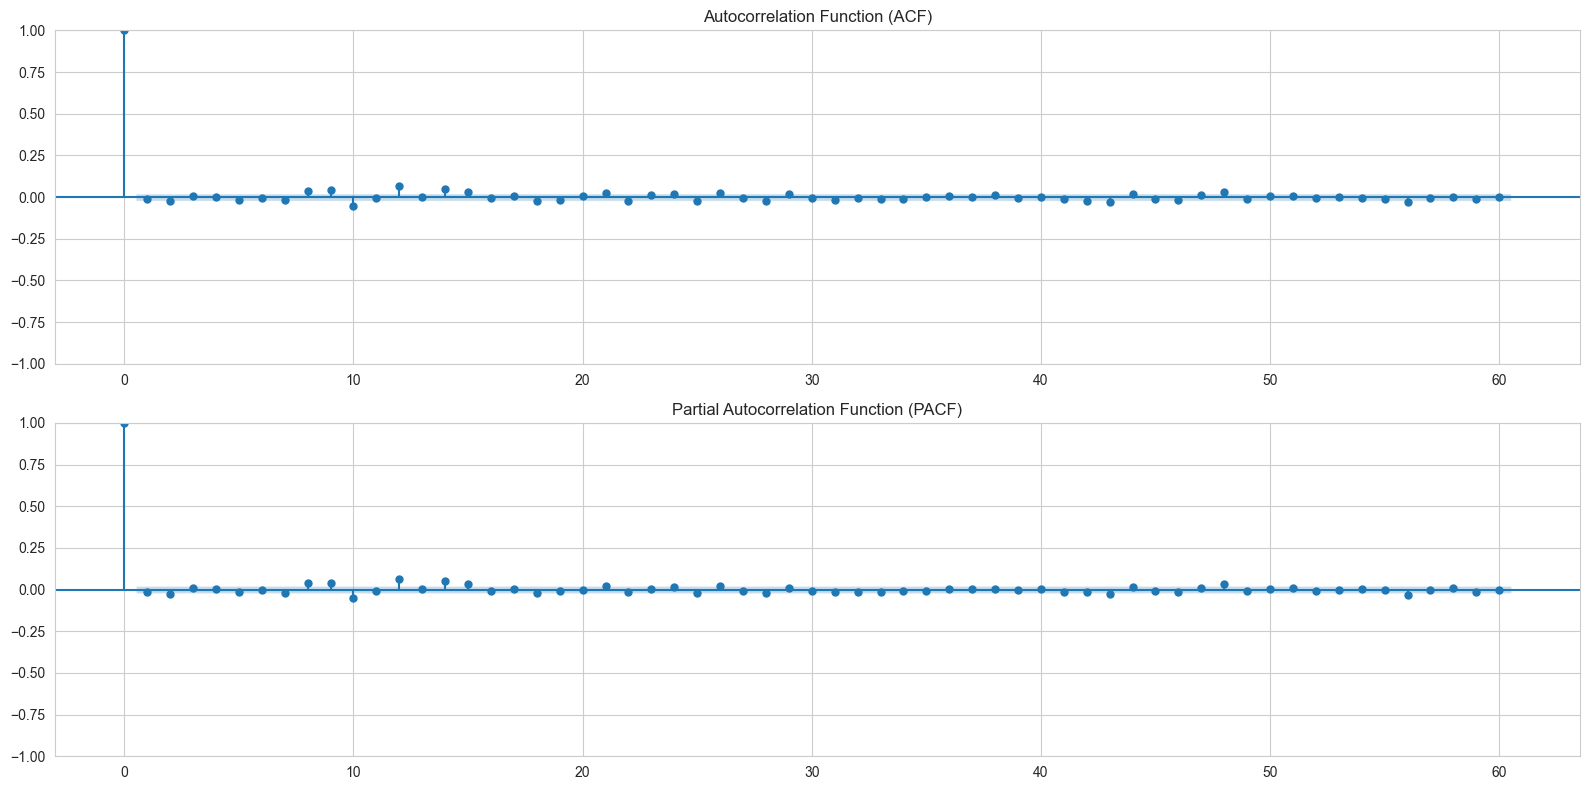


✓ ACF/PACF plot saved to outputs/figures/acf_pacf_plot.png


In [10]:
# Plot ACF and PACF
fig = analyzer.plot_acf_pacf(lags=60, figsize=(16, 8))
plt.savefig("../outputs/figures/acf_pacf_plot.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ ACF/PACF plot saved to outputs/figures/acf_pacf_plot.png")

In [8]:
# Force reload the module
import sys
import importlib

# Remove from cache
if 'time_series_analysis' in sys.modules:
    del sys.modules['time_series_analysis']

# Re-import
from time_series_analysis import TimeSeriesAnalyzer

# Recreate analyzer with updated class
analyzer = TimeSeriesAnalyzer(df)
analyzer.calculate_moving_averages([30, 90, 365])
analyzer.calculate_volatility([30, 90])

print("✓ Module reloaded successfully!")


✓ Module reloaded successfully!


### Interpretation:

**ACF (Autocorrelation Function):**
- Shows correlation between returns and lagged returns
- Slow decay suggests non-stationarity or long memory
- Quick decay to zero suggests stationarity

**PACF (Partial Autocorrelation Function):**
- Shows direct correlation after removing intermediate lags
- Helps identify AR order for ARIMA models

**Implications:**
- Returns show some autocorrelation (momentum effects)
- Structural breaks may cause apparent autocorrelation
- Change point model addresses non-stationarity better than differencing

## 7. Outlier Detection

In [ ]:
# Detect outliers
outliers = analyzer.detect_outliers(threshold=3)

print(f"\n=== OUTLIER DETECTION ===")
print(f"Number of outliers (|z-score| > 3): {len(outliers)}")
print(f"\nTop 10 outliers by absolute return:")
print(outliers.nlargest(10, 'Returns')[['Price', 'Returns']].to_string())

## Summary and Conclusions

### Key Findings:

1. **Non-Stationary Price Series**
   - Clear trends and structural breaks visible
   - Multiple regime changes over 35-year period
   - Justifies use of change point detection models

2. **Volatility Clustering**
   - High volatility periods cluster together
   - Regime-dependent volatility patterns
   - Suggests variance shifts at change points

3. **Autocorrelation Patterns**
   - Returns show some temporal dependence
   - Structural breaks may cause apparent autocorrelation

4. **Outliers and Extreme Events**
   - Several extreme price movements identified
   - Often correspond to major geopolitical/economic events

### Modeling Implications:

1. **Bayesian Change Point Model is Appropriate:**
   - Handles non-stationarity through regime identification
   - Captures both mean and variance shifts
   - Provides uncertainty quantification

2. **Expected Change Points:**
   - 2008 Financial Crisis
   - 2014 Oil Price Crash
   - 2020 COVID-19 Pandemic
   - Possibly 1990 Gulf War, 2011 Arab Spring

3. **Model Configuration:**
   - Estimate 3-5 major change points
   - Include variance shifts in model
   - Use informative priors based on domain knowledge

### Next Steps:

1. Implement Bayesian change point model (Notebook 02)
2. Correlate detected change points with geopolitical events
3. Validate model convergence and posterior distributions
4. Generate comprehensive visualizations and reports